In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# =======================
# 1. Load Dataset
# =======================
df = pd.read_csv("cc_approvals.data")

X = df.drop("approved", axis=1)
y = df["approved"]


In [3]:
# =======================
# 2. Define Columns
# =======================
numeric = ["age", "income", "credit_score", "debt_to_income_ratio"]
categorical = ["employment_status"]

In [4]:
# Preprocessor = scale numerics + encode categoricals
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical)
    ]
)

### Using LogisticRegression

In [5]:
# =======================
# 3. Build Pipeline - Using LogisticRegression
# =======================
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression())
])

In [6]:
# =======================
# 4. Train-Test Split
# =======================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [7]:
# =======================
# 5. Train Model
# =======================
clf.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [8]:
# =======================
# 6. Predictions
# =======================
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

In [9]:
# =======================
# 7. Evaluation
# =======================
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

print("ROC AUC Score:", round(roc_auc_score(y_test, y_prob), 3))


📊 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

ROC AUC Score: 1.0


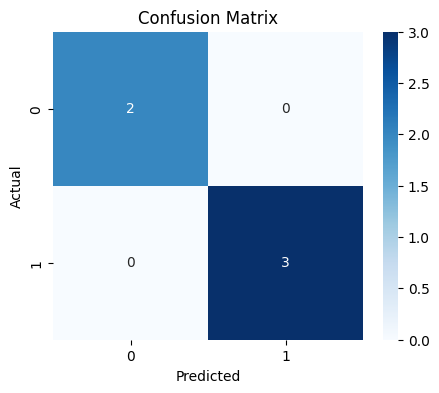

In [10]:
# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

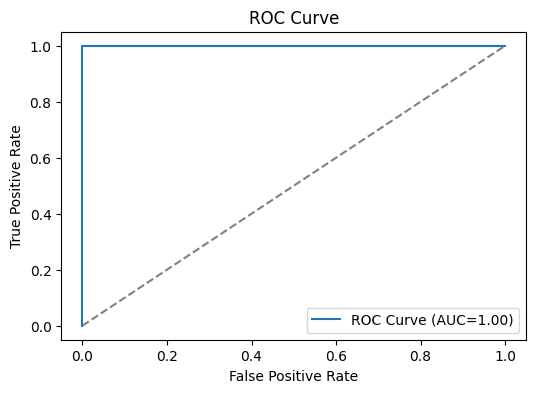

In [11]:
#9. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc_score(y_test, y_prob):.2f})")
plt.plot([0,1],[0,1],'--', color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve")
plt.show()

### Decision Tree

In [12]:
# =======================
# 10. Build Pipeline - Using Decision Tree
# =======================
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

dt_clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", DecisionTreeClassifier(random_state=42))
])


In [14]:
# =======================
# 12. Train-Test Split
# =======================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [15]:
# =======================
# 13. Train Model
# =======================
dt_clf.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [17]:
import joblib
# =======================
# 14. Save Model
# =======================
joblib.dump(clf, "credit_pipeline.pkl")
print("✅ Pipeline saved as credit_pipeline.pkl")

✅ Pipeline saved as credit_pipeline.pkl


In [18]:

# =======================
# 15. Load Model (Offline Use)
# =======================
loaded_model = joblib.load("credit_pipeline.pkl")
print("✅ Pipeline loaded successfully")


✅ Pipeline loaded successfully


In [19]:
import pandas as pd
# =======================
# 16. Define Input Data (same schema as training)
# =======================
new_data = pd.DataFrame([{
    "age": 30,
    "income": 55000,
    "credit_score": 710,
    "debt_to_income_ratio": 0.22,
    "employment_status": "Employed"
}])

print("📄 Input Data:\n", new_data)

# =======================
# 17. Predict
# =======================
y_pred = loaded_model.predict(new_data)
y_prob = loaded_model.predict_proba(new_data)[:, 1]

print("Predicted Class:", y_pred[0])       # 0 = Reject, 1 = Approve
print("Approval Probability:", y_prob[0])

📄 Input Data:
    age  income  credit_score  debt_to_income_ratio employment_status
0   30   55000           710                  0.22          Employed
Predicted Class: 1
Approval Probability: 0.8021064830028617
